### Import the dataframes created during the Data Wrangling process.

In [78]:
# Import dataframe with original full-length reviews
import pandas as pd
reviews_full = reviews = pd.read_pickle('drugsCom_reviews')

In [13]:
# Import dataframe with cleaned reviews
reviews_clean = reviews = pd.read_pickle('drugsCom_reviews_clean')

In [14]:
# Import sparse matrix
from scipy.sparse import load_npz

reviews_sparse = load_npz('reviews_csr.npz')

# Convert back to dataframe
reviews_matrix = pd.DataFrame(reviews_sparse.todense())

In [15]:
# Import column headers for dataframe
import pickle

pickle_in = open('list.pickle', 'rb')
reviews_columns = pickle.load(pickle_in)

# Add column headers back to dataframe
reviews_matrix.columns = reviews_columns

In [57]:
# Add ratings back to the matrix to allow filtering
reviews_matrix['rating'] = reviews_full['rating']

# Do any ratings tend to have longer reviews?

I was curious whether a noticeable difference in review length existed between different ratings, particularly between ratings 8 and higher compared to the rest.

Both character count and word count were used to compare review lengths. Box plots were created and displayed along with the median character counts for each rating. 

Review lengths tend to increase slightly from rating 1 to rating 8, then decrease for ratings 9 and 10. Ratings 1 and 10 tend to have the shortest reviews. But there isn't much of a difference between what we're considering 'good reviews' (rating 8 and up) and the others.

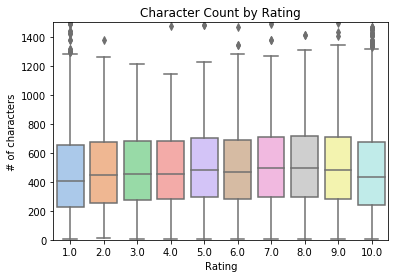

        character_count
rating                 
1.0                 404
2.0                 448
3.0                 454
4.0                 457
5.0                 480
6.0                 468
7.0                 498
8.0                 495
9.0                 483
10.0                434


In [40]:
# Compare character count by rating

import seaborn as sns
import matplotlib.pyplot as plt

# Count number of characters per review
reviews_full['character_count'] = reviews_full['review'].str.len()

# Create box plot for character count by rating
sns.set_palette('pastel')

a = sns.boxplot(x='rating',
            y='character_count',
            data=reviews_full)

plt.title('Character Count by Rating')
plt.ylabel('# of characters')
plt.xlabel('Rating')
plt.ylim(0,1500)
plt.show(a)

# Display median character counts
character_count_median = reviews_full.groupby('rating', axis=0).agg({'character_count':'median'})
print(character_count_median)

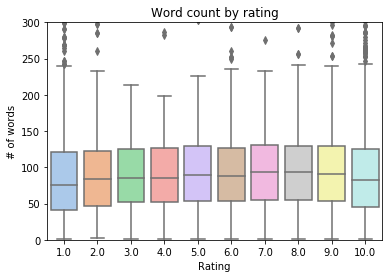

        word_count
rating            
1.0             76
2.0             84
3.0             85
4.0             85
5.0             90
6.0             88
7.0             93
8.0             93
9.0             91
10.0            82


In [41]:
# Compare word count by rating
reviews_full['word_count'] = reviews_full['review'].str.count(' ') + 1

# create box plots for word count by rating
b = sns.boxplot(x='rating',
                y='word_count',
                data=reviews_full)

plt.title('Word count by rating')
plt.ylabel('# of words')
plt.xlabel('Rating')
plt.ylim(0,300)
plt.show(b)

# Display median word counts
word_count_median = reviews_full.groupby('rating', axis=0).agg({'word_count':'median'})
print(word_count_median)

# What drugs tend to have higher or lower ratings?

In [73]:
# Calculate median rating for each drug
drug_median = reviews_full.groupby('drugName', axis=0).agg({'rating':'median'})

# Sort and list drugs with a median rating of 8 or greater
drug_top = drug_median[drug_median['rating'] >= 8.0].sort_values('rating', ascending=False)
print(drug_top)

                           rating
drugName                         
A + D Cracked Skin Relief    10.0
Ovidrel                      10.0
Epivir                       10.0
Epinephrine                  10.0
Ovace Plus                   10.0
...                           ...
Methylphenidate               8.0
Metoprolol Tartrate           8.0
Metronidazole                 8.0
Mexiletine                    8.0
ella                          8.0

[2463 rows x 1 columns]


In [74]:
# Sort and list drugs with a median rating less than 8
drug_bottom = drug_median[drug_median['rating'] < 8.0].sort_values('rating', ascending=False)
print(drug_bottom)

                                                    rating
drugName                                                  
Ortho-Cept                                             7.5
Levsin                                                 7.5
Riluzole                                               7.5
Tolnaftate                                             7.5
Arava                                                  7.5
...                                                    ...
Cabozantinib                                           1.0
Quibron-T                                              1.0
Qutenza                                                1.0
Brompheniramine / dextromethorphan / phenylephrine     1.0
femhrt                                                 1.0

[973 rows x 1 columns]


# What conditions tend to have higher or lower ratings?

In [75]:
# Calculate median rating for each condition
condition_median = reviews_full.groupby('condition', axis=0).agg({'rating':'median'})

# Sort and list conditions with a median rating of 8 or greater
condition_top = condition_median[condition_median['rating'] >= 8.0].sort_values('rating', ascending=False)
print(condition_top)

                           rating
condition                        
Esophageal Candidiasis       10.0
Thyrotoxicosis               10.0
Menopausal Disorders         10.0
Dermatological Disorders     10.0
Dermatologic Lesion          10.0
...                           ...
Seizures                      8.0
Severe Mood Dysregulation     8.0
Hypoparathyroidism            8.0
Hypogonadism, Male            8.0
zen Shoulde                   8.0

[666 rows x 1 columns]


In [77]:
# Sort and list conditions with a median rating less than 8
condition_bottom = condition_median[condition_median['rating'] < 8.0].sort_values('rating', ascending=False)
print(condition_bottom)

                                             rating
condition                                          
14</span> users found this comment helpful.     7.5
Eyelash Hypotrichosis                           7.5
Oral Thrush                                     7.5
Agitated State                                  7.5
Anemia, Sickle Cell                             7.5
...                                             ...
Thromboembolic Stroke Prophylaxis               1.0
Thyroid Suppression Test                        1.0
Neck Pain                                       1.0
Scleroderma                                     1.0
Gastric Cance                                   1.0

[218 rows x 1 columns]


# What are the most frequent words for each rating?

Bar graphs were created and displayed along with a list of the top 10 most used words for each rating.

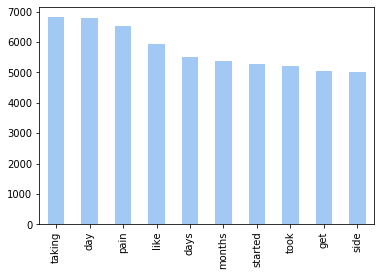

taking     6814
day        6781
pain       6509
like       5937
days       5495
months     5364
started    5282
took       5220
get        5030
side       4998
dtype: int64

In [42]:
# Count top 10 terms for 1.0 ratings
reviews_1 = reviews_matrix[reviews_matrix['rating'] == 1.0]

# Exclude the rating from the count
reviews_1 = reviews_1.drop('rating', 1)
word_count_1 = reviews_1.sum().nlargest(10)

# Plot bar graph of to 10 terms
word_count_1.plot(kind='bar')
plt.show()

# Display list of top 10
display(word_count_1)

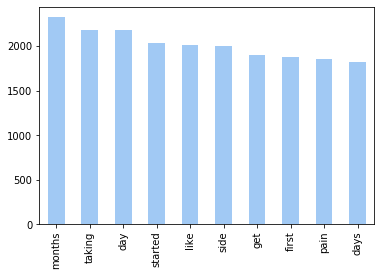

months     2324
taking     2178
day        2176
started    2033
like       2011
side       2003
get        1902
first      1878
pain       1857
days       1817
dtype: int64

In [43]:
# Count top 10 terms for 2.0 ratings
reviews_2 = reviews_matrix[reviews_matrix['rating'] == 2.0]

# Exclude the rating from the count
reviews_2 = reviews_2.drop('rating', 1)
word_count_2 = reviews_2.sum().nlargest(10)

# Plot bar graph of to 10 terms
word_count_2.plot(kind='bar')
plt.show()

# Display list of top 10
display(word_count_2)

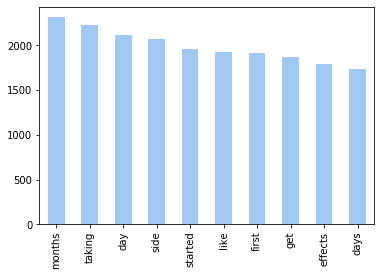

months     2313
taking     2225
day        2109
side       2073
started    1962
like       1924
first      1914
get        1866
effects    1789
days       1735
dtype: int64

In [44]:
# Count top 10 terms for 3.0 ratings
reviews_3 = reviews_matrix[reviews_matrix['rating'] == 3.0]

# Exclude the rating from the count
reviews_3 = reviews_3.drop('rating', 1)
word_count_3 = reviews_3.sum().nlargest(10)

# Plot bar graph of to 10 terms
word_count_3.plot(kind='bar')
plt.show()

# Display list of top 10
display(word_count_3)

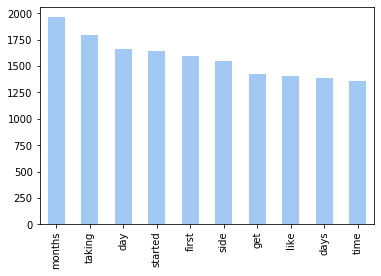

months     1964
taking     1793
day        1663
started    1643
first      1592
side       1551
get        1421
like       1411
days       1392
time       1357
dtype: int64

In [45]:
# Count top 10 terms for 4.0 ratings
reviews_4 = reviews_matrix[reviews_matrix['rating'] == 4.0]

# Exclude the rating from the count
reviews_4 = reviews_4.drop('rating', 1)
word_count_4 = reviews_4.sum().nlargest(10)

# Plot bar graph of to 10 terms
word_count_4.plot(kind='bar')
plt.show()

# Display list of top 10
display(word_count_4)

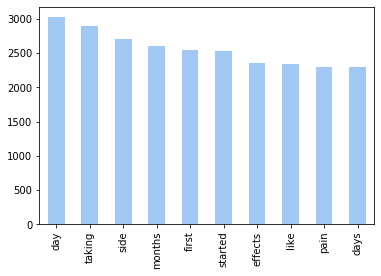

day        3025
taking     2902
side       2714
months     2600
first      2552
started    2532
effects    2349
like       2336
pain       2304
days       2302
dtype: int64

In [46]:
# Count top 10 terms for 5.0 ratings
reviews_5 = reviews_matrix[reviews_matrix['rating'] == 5.0]

# Exclude the rating from the count
reviews_5 = reviews_5.drop('rating', 1)
word_count_5 = reviews_5.sum().nlargest(10)

# Plot bar graph of to 10 terms
word_count_5.plot(kind='bar')
plt.show()

# Display list of top 10
display(word_count_5)

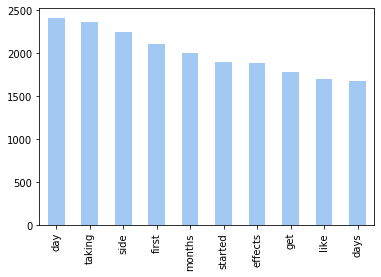

day        2409
taking     2365
side       2248
first      2114
months     2005
started    1895
effects    1883
get        1779
like       1698
days       1676
dtype: int64

In [47]:
# Count top 10 terms for 6.0 ratings
reviews_6 = reviews_matrix[reviews_matrix['rating'] == 6.0]

# Exclude the rating from the count
reviews_6 = reviews_6.drop('rating', 1)
word_count_6 = reviews_6.sum().nlargest(10)

# Plot bar graph of to 10 terms
word_count_6.plot(kind='bar')
plt.show()

# Display list of top 10
display(word_count_6)

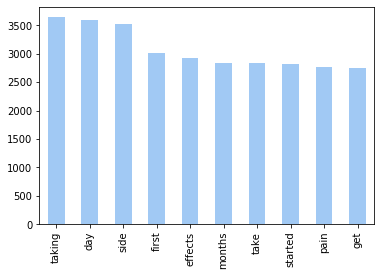

taking     3641
day        3586
side       3522
first      3011
effects    2932
months     2840
take       2830
started    2822
pain       2765
get        2756
dtype: int64

In [48]:
# Count top 10 terms for 7.0 ratings
reviews_7 = reviews_matrix[reviews_matrix['rating'] == 7.0]

# Exclude the rating from the count
reviews_7 = reviews_7.drop('rating', 1)
word_count_7 = reviews_7.sum().nlargest(10)

# Plot bar graph of to 10 terms
word_count_7.plot(kind='bar')
plt.show()

# Display list of top 10
display(word_count_7)

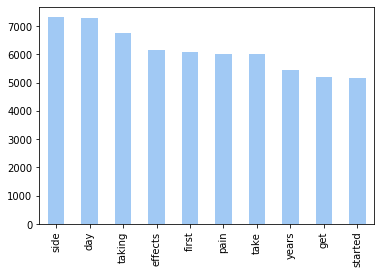

side       7320
day        7270
taking     6760
effects    6156
first      6092
pain       6005
take       5995
years      5431
get        5193
started    5175
dtype: int64

In [49]:
# Count top 10 terms for 8.0 ratings
reviews_8 = reviews_matrix[reviews_matrix['rating'] == 8.0]

# Exclude the rating from the count
reviews_8 = reviews_8.drop('rating', 1)
word_count_8 = reviews_8.sum().nlargest(10)

# Plot bar graph of to 10 terms
word_count_8.plot(kind='bar')
plt.show()

# Display list of top 10
display(word_count_8)

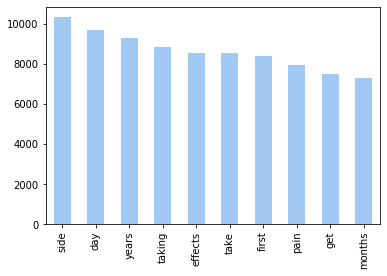

side       10330
day         9717
years       9280
taking      8857
effects     8537
take        8536
first       8377
pain        7965
get         7492
months      7318
dtype: int64

In [50]:
# Count top 10 terms for 9.0 ratings
reviews_9 = reviews_matrix[reviews_matrix['rating'] == 9.0]

# Exclude the rating from the count
reviews_9 = reviews_9.drop('rating', 1)
word_count_9 = reviews_9.sum().nlargest(10)

# Plot bar graph of to 10 terms
word_count_9.plot(kind='bar')
plt.show()

# Display list of top 10
display(word_count_9)

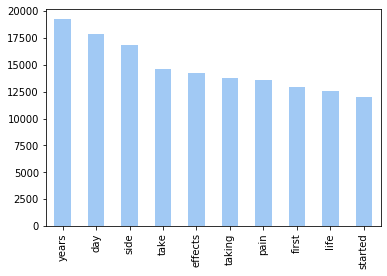

years      19256
day        17814
side       16789
take       14606
effects    14250
taking     13763
pain       13586
first      12938
life       12576
started    12005
dtype: int64

In [51]:
# Count top 10 terms for 10.0 ratings
reviews_10 = reviews_matrix[reviews_matrix['rating'] == 10.0]

# Exclude the rating from the count
reviews_10 = reviews_10.drop('rating', 1)
word_count_10 = reviews_10.sum().nlargest(10)

# Plot bar graph of to 10 terms
word_count_10.plot(kind='bar')
plt.show()

# Display list of top 10
display(word_count_10)

## What words are most used for each rating?

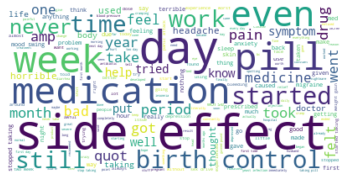

In [25]:
# create word cloud for 1.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 1.0].review)

wordcloud1 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

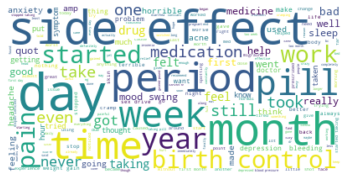

In [26]:
# create word cloud for 2.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 2.0].review)

wordcloud2 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

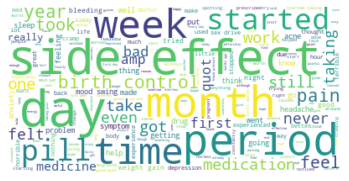

In [27]:
# create word cloud for 3.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 3.0].review)

wordcloud3 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

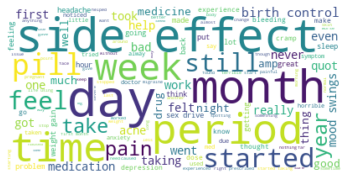

In [28]:
# create word cloud for 4.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 4.0].review)

wordcloud4 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

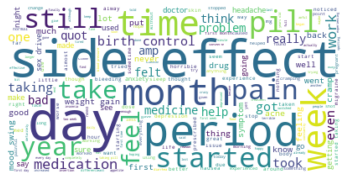

In [29]:
# create word cloud for 5.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 5.0].review)

wordcloud5 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis('off')
plt.show()

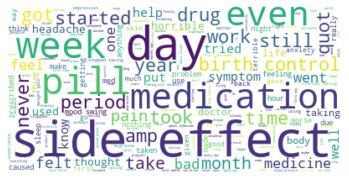

In [30]:
# create word cloud for 6.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 1.0].review)

wordcloud6 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud6, interpolation='bilinear')
plt.axis('off')
plt.show()

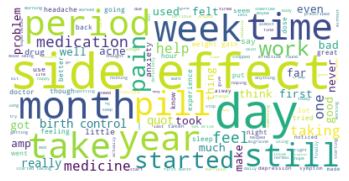

In [31]:
# create word cloud for 7.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 7.0].review)

wordcloud7 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud7, interpolation='bilinear')
plt.axis('off')
plt.show()

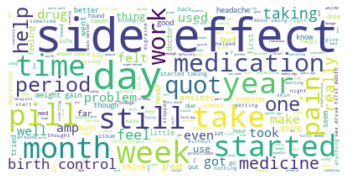

In [32]:
# create word cloud for 8.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 8.0].review)

wordcloud8 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud8, interpolation='bilinear')
plt.axis('off')
plt.show()

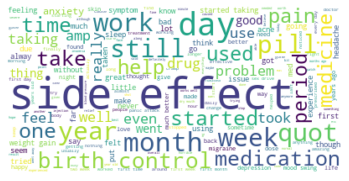

In [33]:
# create word cloud for 9.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 9.0].review)

wordcloud9 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud9, interpolation='bilinear')
plt.axis('off')
plt.show()

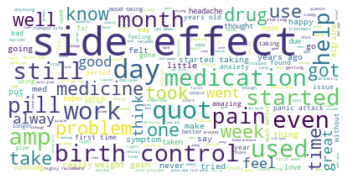

In [34]:
# create word cloud for 10.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 10.0].review)

wordcloud10 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud10, interpolation='bilinear')
plt.axis('off')
plt.show()